In [14]:
# Breanna Powell
# Started 06/19/2024
# Modified from https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_visualization.html

# Libraries required:
# https://pypi.org/project/icepyx/

# Icepyx dependencies: • fiona • GeoPandas • Pangeo 11icepyx • shapely • xarray
# https://icepyx.readthedocs.io/_/downloads/en/stable/pdf/
import icepyx as ipx

In [15]:
##########################################################
# VARIABLES FOR CREATING A BOUNDING BOX TO VIEW THE DATA #
##########################################################

# See this for more info about the variables: https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html
    # short_name is the data of interest
    # spatial_extent is the bounding box. It can be a shp, kml, or gpkg format for a polygon shape
    # date_range is in the format YYYY-MM-DD, or it can be a list of 2 datetime objects
    # cycles is what orbital cycle to use; can be left blank to collect all possible in the search parameters
    # tracks are the laser tracks.

# short_name variable possibilities: https://nsidc.org/data/icesat-2/products
    # ATL07 is Sea Ice Height
    # ATL06 is Land Ice Height
    # ATL10 is Sea Ice Freeboard ** what we are interested in **

# spatial_extent examples, using a rectangle, polygon, or a shape file:
    # rectangle_spatial_extent = [-67, -70, -59, -65] 
    # polygon_spatial_extent = [(-55, 68), (-55, 71), (-48, 71), (-48, 68), (-55, 68)]
    # polygon_file_spatial_extent = './supporting_files/data-access_PineIsland/glims_polygons.shp'

# tracks. See https://icesat-2.gsfc.nasa.gov/science/specs

# Example:
# Larsen C Ice Shelf
short_name = 'ATL10'
spatial_extent = [-67, -70, -59, -65] 
date_range = ['2020-7-1', '2020-8-1']
cycles = ['03']
tracks = ['0948', '0872', '1184', '0186', '1123', '1009', '0445', '0369']

In [16]:
# Larsen C Ice Shelf
# short_name = 'ATL06'
# date_range = ['2020-7-1', '2020-8-1']
# spatial_extent = [-67, -70, -59, -65] 
# cycles = ['03']
# tracks = ['0948', '0872', '1184', '0186', '1123', '1009', '0445', '0369']

In [17]:
# Use the parameters that you specified to query the database for that area in that date range
region = ipx.Query(short_name, spatial_extent, date_range)

In [18]:
# Relies on geoviews library under the hood
print(region.product)
print(region.dates)
print(region.start_time)
print(region.end_time)
print(region.product_version)
print(list(set(region.avail_granules(cycles=True)[0]))) #region.cycles
print(list(set(region.avail_granules(tracks=True)[0]))) #region.tracks

ATL10
['2020-07-01', '2020-08-01']
00:00:00
23:59:59
006
['08']
['0445', '0376', '0102', '0544', '0430', '0422', '0140', '0361', '0567', '0483', '0186', '0163', '0506', '0559', '0315', '0323', '0262', '0125', '0201', '0384']


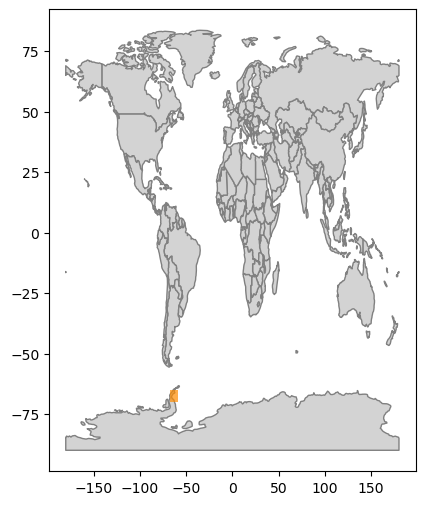

In [19]:
region.visualize_spatial_extent()